# NLP. Lesson 7. Embeddings

**Embedding** - is an important term that is used for **representing words for text analysis in the form of real-valued vectors**. It is considered one of the most significant breakthroughs of deep learning for solving challenging natural language processing problems.

In this approach, words and documents are represented in the form of numeric vectors allowing similar words to have similar vector representations. The extracted features are fed into a machine learning model so as to work with text data and preserve the semantic and syntactic information. It can approximate meaning and represent a word in a lower dimensional space. For instance, a word embedding with 50 values holds the capability of representing 50 unique features. Many people choose pre-trained word embedding models like Flair, fastText, SpaCy, and others.

Word embedding techniques:
- Word2Vec(CBOW and Skip-gram)
- fastText
- GloVe (Global Vectors for Word Representation)
- BERT (Bidirectional Encoder Representations from Transformers), etc.

### Distributional semantics

Distributional semantics is a theory in linguistics and natural language processing that posits that the meaning of words can be inferred from the contexts in which they appear. According to this theory, words that occur in similar contexts are likely to have similar meanings: "a word is characterized by the company it keeps".

The distributional hypothesis suggests that the more semantically similar two words are, the more distributionally similar they will be in turn, and thus the more that they will tend to occur in similar linguistic contexts.

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab07/DistributionalSemantics.png" alt="Distributional Semantics" width="400"/>

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab07/relationship.png" alt="Distributional Semantics" width="587"/>

## Models for computing word representations. Word2Vec algorithms.


The main idea of Word2Vec is that we need to put information about meanings into word vectors. But how? Learn word vectors by teaching them to predict contexts. As you remember from the distributional hypothesis, if vectors "know" about contexts, they "know" word meaning. Word2Vec is an iterative method. Its main idea is as follows:

- take a huge text corpus
- go over the text with a sliding window, moving one word at a time. At each step, there is a central word and context words (other words in this window)
- for the central word, compute probabilities of context words
- adjust the vectors to increase these probabilities.

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab07/DistrSem1.png" alt="Distributional Semantics" width="600"/>

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab07/DistrSem2.png" alt="Distributional Semantics" width="600"/>

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab07/DistrSem3.png" alt="Distributional Semantics" width="600"/>

For each position in a text corpus Word2Vec predicts context within an m-sized window given a central word $w_t$

**Likelihood:** $L(\theta) = \prod_{t=1}^{T} \prod_{-m<=j<=m, j!=0>}P(w_{t+j}|w_t, \theta)$, where $\theta$ are all variables to be optimized

**Objective function: Average Negative Log-Likelihood:** $J(\theta) =$ $-{1}\over{T}$ $log L(\theta) =$ ${-1}\over{T}$ $\sum_{t=1}^{T}\sum_{-m<=j<=m, j!=0} logP(w_{t+j}|w_t, \theta)$

$P(w_{t+j}|w_t, \theta)$: for each word we have 2 vectors: $v_w$ - central word - and $u_w$ - context word. Then for the central word(c) and context word (o) probability of the context word is: $P(o|c) = \frac{exp(u_o^T*v_c)}{\sum_{w∈V}exp(u_w^T*v_c)}$ (based on the softmax function!)

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab07/prob1.png" alt="Probability computation" width="600"/>

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab07/prob2.png" alt="Probability computation" width="600"/>

**Training:** $\theta^{new} = \theta^{old} - \alpha ∇_{\theta}J(\theta)$ - gradient descent. Update 1 word at a time - each update is for a single pair of a center word and one of its context words.

Lets consider a sentence from teh pictures: I saw a cute gray cat playing in the garden. Choose a word 'cat' and a context window of size 2: 'cute gray playing in' - context words.

Loss: $J_{t,j}(\theta) = -logP(cute|cat) = -log \frac{exp(u_{cute}^T*v_{cat})}{\sum_{w∈V}exp(u_w^T*v_{cat})} = -u_{cute}^T*v_{cat} + log \sum_{w∈V} exp(u_w^T*v_{cat})$

By making an update to minimize $J_{t,j}(\theta)$, we force the parameters to increase similarity (dot product) of $v_{cat}$ and $u_{cute}$ and, at the same time, to decrease similarity between $v_{cat}$ and $u_{w}$ for all other words $w$ in the vocabulary. But, since we make updates for each context word (and for all central words in your text), on average over all updates our vectors will learn the distribution of the possible contexts.

### Continuous Bag of Words (CBOW)
A bag of words is one of the popular word embedding techniques of text where each value in the vector would represent the count of words in a document/sentence. In other words, it extracts features from the text. We also refer to it as vectorization.

In the CBOW model, the goal is to predict a `target word` based on its surrounding context words within a fixed window size. The model takes as input a `context window` (a sequence of surrounding words) and predicts the target word.

>Encoding: One Hot Vector - 1 bit '1' and all others are '0'. Vector length - number of words in language. Prediction of a _center_ word from a context window

Example: [video](https://www.youtube.com/watch?app=desktop&v=UqRCEmrv1gQ)


### Skip-gram

In contrast to CBOW, the Skip-gram model aims to predict the `surrounding context` words given a target word. The model takes as input a target word and predicts the context words within a fixed window size around the target word.


### Comparison:

- CBOW:
  - Pros: Faster training time, better performance for frequent words.
  - Cons: Poor performance for infrequent words, ignores word order.
- Skip-gram:
  - Pros: Captures fine-grained semantic information, performs well for infrequent words, preserves word order.
  - Cons: Slower training time, requires more data.

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab07/CBOWandSkipGram.png" alt="Comparison" width="600"/>

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab07/CBOWandSkipGram2.png" alt="Comparison" width="614"/>

## Other word embeddings techniques

- **fastText Embeddings**: fastText is an extension of word2vec that incorporates subword information into the embedding learning process. While Word2Vec treats eaach word as the smallest entity, fasttext represents words as the sum of the embeddings of their constituent character n-grams, allowing it to handle out-of-vocabulary words and capture morphological information. For the word "jumping", the subword n-grams could be ["jum", "ump", "mpi", "pin", "ing"].


- **GloVe (Global Vectors for Word Representation) Embeddings**: GloVe is a word embedding model that learns word vectors by factorizing the co-occurrence matrix of words in a corpus (built from the entire corpus). It leverages global statistical information to capture word semantics and has been shown to perform well on various NLP tasks. The goal is to find word vectors such that their dot product equals the log of the probability of their co-occurrence. Example for the words "king", "queen", "man", and "woman": the relationship "king - man + woman ≈ queen" can be captured in the vector space.


## fastText

In Word2Vec, an embedding is created for each word. As such, it can’t handle any words it has not encountered during its training. For example, words such as “tensor” and “flow” are present in the vocabulary of Word2Vec. But if you try to get embedding for the compound word “tensorflow”, you will get an out of vocabulary error. For words with same radicals such as “eat” and “eaten”, Word2Vec doesn’t do any parameter sharing. Each word is learned uniquely based on the context it appears in.

More about fastText training [here](https://amitness.com/posts/fasttext-embeddings), get familiar with modifications to the skip-gram method in fastText.


#### Example of usage of a pretrained model

In [1]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz && gzip -dv cc.en.300.bin.gz

--2024-09-11 23:19:31--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.34.7, 13.226.34.53, 13.226.34.122, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.34.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   124MB/s    in 49s     

2024-09-11 23:20:20 (88.5 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]

gzip: cc.en.300.bin already exists; do you wish to overwrite (y or n)? ^C


In [2]:
!pip install fasttext

In [3]:
import fasttext

model = fasttext.load_model("cc.en.300.bin")

In [4]:
vector = model.get_word_vector("hello")
print(vector.shape)

(300,)


In [5]:
nearest_neighbors = model.get_nearest_neighbors("hello")
print(nearest_neighbors)

[(0.7143728733062744, 'hellow'), (0.7095366716384888, 'hello.'), (0.703833818435669, 'hi'), (0.6944323182106018, 'hullo'), (0.6912142038345337, 'hello-'), (0.663975715637207, 'Hello'), (0.6563249230384827, 'hello.I'), (0.6529381275177002, 'howdy'), (0.6283847689628601, 'hellooo'), (0.6235803365707397, 'hellooooo')]


In [6]:
analogy_result = model.get_analogies("king", "man", "woman", k=1)
print("Analogy relationship: king - man + woman =", analogy_result)

Analogy relationship: king - man + woman = [(0.7554811835289001, 'queen')]


The analogy relationship is typically explored through vector arithmetic, where the difference between word vectors captures the semantic relationship between words. By using subword information, fastText can generate embeddings for words not seen during training, reducing the problem of OOV (out of vocabulary) words.

Similar to Word2Vec, fastText can be trained using either the CBOW or Skip-gram models. The main difference is that the input words are represented by their subword vectors.

FastText is highly efficient for text classification tasks, providing state-of-the-art performance with minimal tuning. Example applications include sentiment analysis, spam detection, and topic classification. FastText’s subword approach makes it robust to rare words and those not seen during training.



You can train the fasttext by yourself using your own training data. Here is the example of training using skipgram, but you can use 'cbow' as well.

In [7]:
# Get the embedding vector for a word
word_vector = model.get_word_vector('hello')
print(word_vector)

# Find similar words
similar_words = model.get_nearest_neighbors('jumping')
similar_words

[ 1.57576188e-01  4.37820926e-02 -4.51271934e-03  6.65931404e-02
  7.70346820e-02  4.85855248e-03  8.19822028e-03  6.52402919e-03
  9.25899856e-03  3.53899002e-02 -2.31395271e-02 -4.91807126e-02
 -8.32642540e-02  1.56014524e-02  2.54856616e-01  3.45423706e-02
 -1.07451361e-02 -7.80188590e-02 -7.08099529e-02  7.62385577e-02
 -6.09613657e-02  4.48625796e-02 -7.29744136e-02  1.30583309e-02
  3.14881057e-02 -3.10055036e-02  1.66004002e-02  1.74405202e-02
 -7.35838860e-02  1.18252613e-01 -1.21330231e-01 -4.09253240e-02
  2.93969568e-02  4.84445989e-02 -1.33816330e-02 -1.74765270e-02
  7.51308873e-02  9.97046307e-02 -4.00476977e-02  4.05735290e-03
 -7.21896589e-02 -4.43356819e-02 -1.22628408e-03  7.56693557e-02
  3.98401320e-02  3.22643593e-02  1.95914153e-02  4.68016043e-02
 -1.46228177e-02  1.12967767e-01  3.15065160e-02 -1.02312110e-01
  1.58124104e-01 -2.76147053e-02 -3.39851156e-02 -1.77006852e-02
 -5.73529862e-04  1.10789239e-01 -1.64533369e-02 -3.14955460e-03
 -4.22914140e-02  1.11429

[(0.7935405969619751, 'leaping'),
 (0.7553118467330933, 'jump'),
 (0.7185051441192627, 'Jumping'),
 (0.695732057094574, 'jumps'),
 (0.6326279044151306, 'jumped'),
 (0.6295326948165894, 'somersaulting'),
 (0.621809184551239, 'backflipping'),
 (0.6150370240211487, 'jumping.'),
 (0.6037074327468872, 'hopping'),
 (0.5924608111381531, 'lunging')]

### Task 1
Find 20 the nearest neighbors for the words "science", "art", and "business". Cluster these nearest neighbors based on their cosine similarity. Explain the result.

>Reminder: Cosine Similarity:

**Cosine similarity** is a mathematical metric used to measure the similarity between two vectors in a multi-dimensional space, particularly in high-dimensional spaces, by calculating the **cosine of the angle** between them. This measure returns a value between -1 and 1; a value closer to 1 indicates greater similarity.

Suppose we have three words: apple, house, and flat. Their corresponding embedding vectors are: [1,5,2], [5,3,4], and [4,2,4]

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab07/cosine.png" alt="3 Vectors" width="500"/>

Here you can notice that the angle between apple ([1,5,2]) and house ([5,3,4]) is bigger than between flat ([4,2,4]) and house ([5,3,4]) (house and flat cosine is 0.9899). Thus, words, embedded as [5,3,4] and [4,2,4] (house and flat) will be more similar semantically, than words embedded as [5,3,4] and [1,5,2] (house and apple).

Why cosine similarity? For example, if two documents have the same words but in different frequencies, Euclidean distance might consider them quite different due to the differences in magnitude (frequency). Cosine similarity, however, would capture their similarity more effectively because it is less sensitive to the frequency of the words and more focused on their presence or absence in the documents.

In [8]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans


words = ["science", "art", "business"]
results = {}

# Retrieve nearest neighbors
for word in words:
    nearest_neighbors = model.get_nearest_neighbors(word, k=20)
    results[word] = [neighbor[1] for neighbor in nearest_neighbors]

# Flatten the list and get embeddings
all_words = list(set([word for sublist in results.values() for word in sublist]))
word_vectors = np.array([model.get_word_vector(word) for word in all_words])

# Compute similarity matrix
similarity_matrix = cosine_similarity(word_vectors)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(similarity_matrix)

# Map words to their clusters
word_to_cluster = {word: kmeans.labels_[i] for i, word in enumerate(all_words)}

# Assertions
# Check if specific words are in the expected clusters
assert word_to_cluster["sceince"] == word_to_cluster["science."], "Expected 'biology' and 'science' to be in the same cluster"
assert word_to_cluster["artwork"] == word_to_cluster["artworks"], "Expected 'painting' and 'art' to be in the same cluster"

# Additional validation can be done manually by examining cluster labels
print("Cluster assignments:")
for word, cluster in word_to_cluster.items():
    print(f"Word: {word}, Cluster: {cluster}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster assignments:
Word: busine, Cluster: 2
Word: businees, Cluster: 2
Word: business.The, Cluster: 2
Word: sceince, Cluster: 1
Word: non-science, Cluster: 1
Word: enterprise, Cluster: 2
Word: arts, Cluster: 0
Word: art.What, Cluster: 0
Word: bussiness, Cluster: 2
Word: sciences, Cluster: 1
Word: business.It, Cluster: 2
Word: busness, Cluster: 2
Word: art.There, Cluster: 0
Word: business.Now, Cluster: 2
Word: buisness, Cluster: 2
Word: art.But, Cluster: 0
Word: business.When, Cluster: 2
Word: science.This, Cluster: 1
Word: art.That, Cluster: 0
Word: businss, Cluster: 2
Word: artworks, Cluster: 0
Word: busniess, Cluster: 2
Word: art.The, Cluster: 0
Word: science.In, Cluster: 1
Word: businesses, Cluster: 2
Word: art.It, Cluster: 0
Word: art.In, Cluster: 0
Word: art., Cluster: 0
Word: science--and, Cluster: 1
Word: artwork, Cluster: 0
Word: art.I, Cluster: 0
Word: science.As, Cluster: 1
Word: art.So, Cluster: 0
Word: science.But, Cluster: 1
Word: science.I, Cluster: 1
Word: business.Wha

## GloVe
GloVe differs from other methods like Word2Vec by leveraging global word co-occurrence statistics `(matrix)` from a corpus to generate word embeddings.
> Each element in this matrix X represents how often word j appears in the context of word i.

GloVe's objective is to learn word high-dimensional (50, 100, 200 dimensions) **vectors such that their dot product equals the logarithm of the probability of their co-occurrence**. Similar words are located closer together in this vector space, allowing for semantic relationships to be captured effectively.

What is especially interesting, is the way GloVe controls the influence of rare and frequent words: loss for each pair (w, c) is weighted in a way that:
- rare events are penalized,
- very frequent events are not over-weighted

Applications:
- Evaluating similarity between words and concepts based on vector distance
- Solving analogies
- NER
- Improving the classification of text documents

In [9]:
import gensim.downloader as api

# Load the pre-trained GloVe model
glove_model = api.load("glove-wiki-gigaword-100")


# Find similarity between two words
similarity = glove_model.similarity("cat", "dog")
print("Similarity between 'cat' and 'dog':", similarity)

# Find analogy relationship
analogy = glove_model.most_similar(positive=["king", "woman"], negative=["man"])
print("Analogy relationship: king - man + woman =", analogy)

[==================================================] 100.0% 128.1/128.1MB downloaded
Similarity between 'cat' and 'dog': 0.8798075
Analogy relationship: king - man + woman = [('queen', 0.7698540687561035), ('monarch', 0.6843381524085999), ('throne', 0.6755736470222473), ('daughter', 0.6594556570053101), ('princess', 0.6520534157752991), ('prince', 0.6517034769058228), ('elizabeth', 0.6464517712593079), ('mother', 0.631171703338623), ('emperor', 0.6106470823287964), ('wife', 0.6098655462265015)]


### Task 2
Using fasttext model build vectors from the given words. With the PCA model reduce the dimensionality to 2D and plot the results.

> Reminder: [PCA model](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

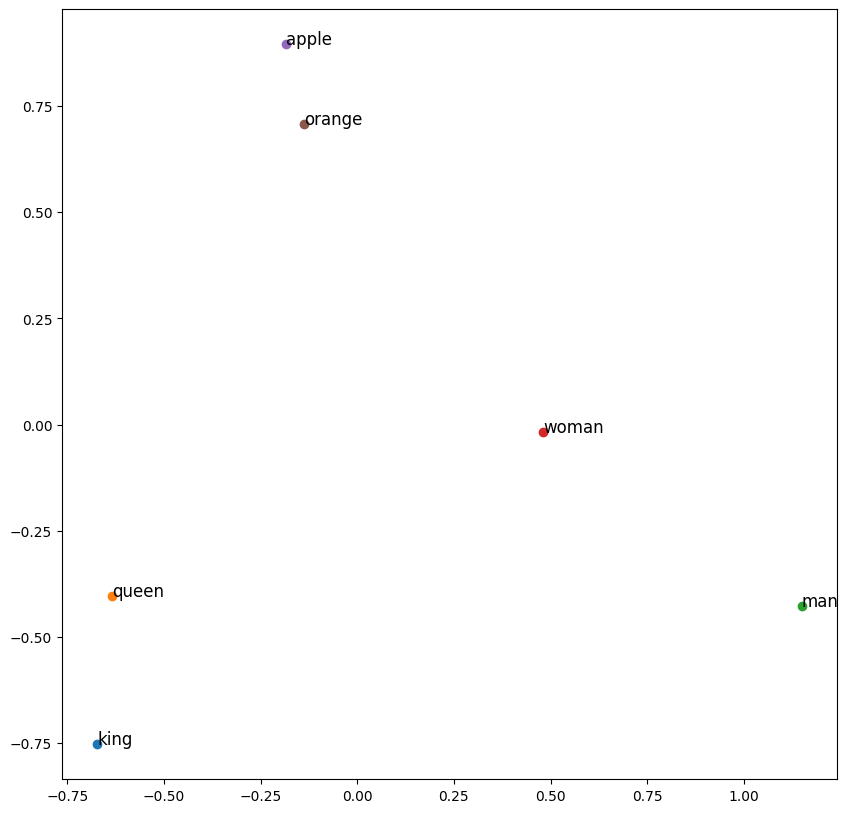

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Select a subset of words for visualization
words = ['king', 'queen', 'man', 'woman', 'apple', 'orange']
vectors = np.array([model[word] for word in words])

assert len(vectors) == len(words), "Number of vectors does not match number of words"

# Reduce dimensions to 2D
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(result[i, 0], result[i, 1])
    plt.text(result[i, 0], result[i, 1], word, fontsize=12)
plt.show()

## Vector databases

A vector database is a specialized database that stores and efficiently queries high-dimensional vectors, such as word or sentence embeddings. These databases enable fast similarity search and retrieval of similar vectors based on distance metrics such as cosine similarity or Euclidean distance.

## Examples
### FAISS (Facebook AI Similarity Search)
FAISS is a library developed by Facebook AI Research for efficient similarity search and clustering of dense vectors. It is optimized for both CPU and GPU, making it suitable for large-scale vector searches.
#### Applications:
- **Image Retrieval**: Finding similar images in a large database based on their feature vectors.
- **Recommendation Systems**: Suggesting products or content based on vector representations of user preferences and items.
- **Document Search**: Retrieving documents that are similar to a given query document.

### Annoy (Approximate Nearest Neighbors Oh Yeah)
Annoy is a library developed by Spotify for performing approximate nearest neighbor search. It uses random projections and is optimized for fast read-only queries. \
Applications:
- **Music Recommendation**: Finding similar tracks based on audio embeddings or user behavior.
- **Content-Based Search**: Recommending articles, videos, or other content based on vector embeddings.
Spotify uses Annoy to recommend songs to users by finding similar tracks based on audio features.

In [11]:
%%capture
!pip install chromadb

In [12]:
import chromadb

chroma_client = chromadb.Client()

In [13]:
collection = chroma_client.create_collection(name="test_collection")

In [14]:
documents = [
    "The latest iPhone model comes with impressive features and a powerful camera.",
    "Exploring the beautiful beaches and vibrant culture of Bali is a dream for many travelers.",
    "Einstein's theory of relativity revolutionized our understanding of space and time.",
    "Traditional Italian pizza is famous for its thin crust, fresh ingredients, and wood-fired ovens.",
    "The American Revolution had a profound impact on the birth of the United States as a nation.",
    "Regular exercise and a balanced diet are essential for maintaining good physical health.",
    "Leonardo da Vinci's Mona Lisa is considered one of the most iconic paintings in art history.",
    "Climate change poses a significant threat to the planet's ecosystems and biodiversity.",
    "Startup companies often face challenges in securing funding and scaling their operations.",
    "Beethoven's Symphony No. 9 is celebrated for its powerful choral finale, 'Ode to Joy.'",
]

genres = [
    "technology",
    "travel",
    "science",
    "food",
    "history",
    "fitness",
    "art",
    "climate change",
    "business",
    "music",
]

collection.add(
    documents=documents,
    ids=[f"id{i}" for i in range(len(documents))],
    metadatas=[{"genre": g} for g in genres],
)

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:01<00:00, 76.3MiB/s]


In [15]:
results = collection.query(query_texts=["I'm hungry"], n_results=1)
results

{'ids': [['id3']],
 'distances': [[1.7825171947479248]],
 'metadatas': [[{'genre': 'food'}]],
 'embeddings': None,
 'documents': [['Traditional Italian pizza is famous for its thin crust, fresh ingredients, and wood-fired ovens.']],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents', 'distances']}

In [16]:
results = collection.query(query_texts=["sport"], n_results=1)
results

{'ids': [['id5']],
 'distances': [[1.5580840110778809]],
 'metadatas': [[{'genre': 'fitness'}]],
 'embeddings': None,
 'documents': [['Regular exercise and a balanced diet are essential for maintaining good physical health.']],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents', 'distances']}

## Contextual Embeddings

In this lab, you've learned about two popular techniques for creating word embeddings: Continuous Bag of Words (CBOW) and Skip-Gram. These techniques are used in word2vec, a popular algorithm for generating word embeddings, GloVe, and fastText.
However, there's another powerful technique that has revolutionized the field of NLP in recent years: BERT (Bidirectional Encoder Representations from Transformers). Developed by Google, BERT is a pre-trained language model that has achieved state-of-the-art results in a wide range of NLP tasks, such as question answering, sentiment analysis, and text classification.

BERT uses a different approach to generate embeddings, **which we'll explore in more detail in Lab 12**. For now, let's just say that BERT's embeddings are contextualized, meaning that they take into account the context in which a word is used, rather than relying on a fixed vector representation. Don't worry if you don't fully understand BERT just yet – we'll dive deeper into its architecture and applications later in the course.

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab07/bert.jpg" alt="3 Vectors" width="700"/>


Contextual Embeddings models:
- **ELMo** (Embeddings from Language Models): Uses deep, bi-directional LSTM networks to capture context.
- **BERT** (Bidirectional Encoder Representations from Transformers): Uses transformer models to provide context-aware embeddings.

In [17]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', use_fast=True)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased').to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [19]:
from transformers import Trainer, TrainingArguments
from datasets import load_dataset

dataset = load_dataset('imdb')

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [20]:
print("Training set:")
print(dataset['train'][0])
print("Number of training examples:", len(dataset['train']))
print("Number of test examples:", len(dataset['test']))

# Check the label distribution
labels = [example['label'] for example in dataset['train']]
label_counts = {label: labels.count(label) for label in set(labels)}
print("Label distribution:", label_counts)

Training set:
{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are 

In [21]:
from datasets import load_dataset, DatasetDict

def get_sampled_dataset(dataset, num_samples=1000):
    # Create a dictionary to hold the sampled splits
    sampled_dataset_dict = {}
    for split in ['train', 'test']:
        # Shuffle and select a subset of the data
        sampled_data = dataset[split].shuffle(seed=42).select(range(num_samples))
        # Add the sampled data to the dictionary
        sampled_dataset_dict[split] = sampled_data

    # Return as a DatasetDict
    return DatasetDict(sampled_dataset_dict)

In [22]:
num_samples = 1000

# Get the sampled dataset
dataset = get_sampled_dataset(dataset, num_samples=num_samples)

### Task 3
 Train a BERT model for sentiment classification on the IMDB dataset, explore the dataset, understand training parameters, and compare baseline and optimized pipelines.
 Which metric is more appropriate for this task? Why? Try to achieve accuracy 0.86 and F1 0.85.

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

#### Baseline

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import default_data_collator
from datasets import load_dataset
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(p):
    predictions = np.argmax(p.predictions, axis=1)
    accuracy = accuracy_score(p.label_ids, predictions)
    f1 = f1_score(p.label_ids, predictions, average='weighted')
    return {
        'accuracy': accuracy,
        'f1': f1
    }

# Define the Trainer for evaluation
training_args = TrainingArguments(
    per_device_eval_batch_size=8,
    output_dir='./results',
    evaluation_strategy='epoch',
)

trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=tokenized_datasets['test'],
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

# Evaluate the pre-trained model
eval_results = trainer.evaluate()
print("Initial Evaluation Results:", eval_results)

### Task 3. Continue

In [ ]:
from datasets import load_metric
import torch

# Define metrics
metric = load_metric('accuracy')

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

## What about Images? How do they relate to the text?
### Relationship Between Image and Text Embeddings:

- Multimodal Learning: To bridge the gap between image and text data, multimodal learning approaches are employed. These approaches aim to create shared representations where both image and text data can be compared and analyzed in a unified space.
- Joint Embedding Spaces: In a joint embedding space, both image and text embeddings are mapped to a common vector space. This allows for comparisons between text and images, enabling tasks like image captioning, visual question answering, and cross-modal retrieval.
- Cross-Modal Retrieval: This involves retrieving relevant images given a text query or vice versa. For example, a model might return images related to a textual description or generate a textual description for a given image by comparing their embeddings in the joint space.
- Attention Mechanisms: Modern models like transformers use attention mechanisms to align and relate image and text embeddings effectively. For instance, the Vision-Language Pre-trained (VLP) models leverage attention to create rich, contextually aware representations of both modalities.

### Applications:

- Image Captioning: Generating textual descriptions for images by understanding and interpreting the visual content.
- Visual Question Answering (VQA): Answering questions about an image by interpreting both the visual content and the textual question.
- Cross-Modal Retrieval: Finding relevant images based on textual queries or generating text descriptions for images.

## What is CLIP?

CLIP (Contrastive Language-Image Pre-training) is a deep learning model that combines computer vision and natural language processing (NLP) to learn a joint representation of images and text.

Developed by OpenAI, CLIP is a type of multimodal model that can be fine-tuned for various downstream tasks, such as:

- Image-text matching: Given an image and a text description, CLIP can predict whether the text accurately describes the image.
- Image classification: CLIP can be used for image classification tasks, such as object detection, scene understanding, and image captioning.
- Text-to-image synthesis: CLIP can be used to generate images from text descriptions.

CLIP is trained on a massive dataset of images and text pairs, using a contrastive learning objective. The model learns to predict whether a given text description matches an image, by contrasting the similarity between the text and image embeddings.

In [ ]:
from transformers import AutoTokenizer, CLIPModel, AutoProcessor

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")

inputs = tokenizer(["a photo of a cat", "a photo of a dog"], padding=True, return_tensors="pt")

text_embeds = model.get_text_features(**inputs)
text_embeds

In [ ]:
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

### Task 4
Extract  image features

In [ ]:
processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")

inputs = processor(images=image, return_tensors="pt")

image_features = model.get_image_features(**inputs)
image_features

### Task 5
Use 'magic' to understand what is shown in the picture. Hint: you can use cosine similarity, higher results correspond to higher probability.

In [ ]:
import torch

torch.matmul(text_embeds, image_features.t())

In [ ]:
def cosine_similarity(embedding1, embedding2):
    return torch.nn.functional.cosine_similarity(embedding1, embedding2)

similarity = cosine_similarity(image_features, text_embeds)
print(f"Cosine similarity between image and text: {similarity}")

# Word2Vec training

Your task is to train a Word2Vec model on the Simpsons dialog dataset to obtain word embeddings, and then use these embeddings to find similar words and words that do not match.

You will dive into the world of America's favorite animated family - The Simpsons! You'll be working with a unique dataset that contains a vast collection of Simpsons dialogs, spanning over 600 episodes, from 1989 to present.

In this task, you will be asked to:

- Preprocess the dataset to prepare it for analysis
- Apply NLP techniques to extract insights from the dialogues

In [ ]:
import re
import pandas as pd
from time import time
from collections import defaultdict
import spacy

In [ ]:
!python -m spacy download en_core_web_sm
!wget https://raw.githubusercontent.com/Dnau15/LabImages/main/data/txt_data/simpsons_dataset.csv

In [ ]:
df = pd.read_csv('simpsons_dataset.csv')
df.shape

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [ ]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['spoken_words'])

In [ ]:
txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000)]

In [ ]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

We are using Gensim Phrases package to automatically detect common phrases (bigrams) from a list of sentences. https://radimrehurek.com/gensim/models/phrases.html

The main reason we do this is to catch words like "mr_burns" or "bart_simpson" !

In [ ]:
from gensim.models.phrases import Phrases, Phraser

sent = [row.split() for row in df_clean['clean']]
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[sent]

# Task 6
Find frequency of each word and then find top-10 most frequence words.

In [ ]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

In [ ]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

# Task 7

Train Word2Vec model and then complete subtasks

In [ ]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(min_count=20,
                     window=2,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     vector_size=300,
                     workers=6)

In [ ]:
w2v_model.build_vocab(sentences, progress_per=10000)

In [ ]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

In [ ]:
w2v_model.init_sims(replace=True)

Analyse and try to understand the difference between synonyms between "homer" and "home simpson"

In [ ]:
w2v_model.wv.most_similar(positive=["homer"])

In [ ]:
w2v_model.wv.most_similar(positive=["homer_simpson"])

In [ ]:
w2v_model.wv.most_similar(positive=["marge"])

In [ ]:
w2v_model.wv.most_similar(positive=["bart"])

Which word is to woman as homer is to marge? Is your answer meaningful? Try to proof


In [ ]:
w2v_model.wv.most_similar(positive=["woman", "bart"], negative=["man"], topn=3)

# Conclusion

Throughout this lesson, we've delved into the world of word embeddings and their applications in Natural Language Processing. We've explored various techniques, each offering unique advantages and insights into how computers understand and process human language.

- Embedding. Word embeddings are foundational in NLP, transforming words into dense vectors that capture semantic relationships. These embeddings enable machines to grasp meanings and contexts, enhancing tasks like language modeling, sentiment analysis, and information retrieval.
- Distributional Semantics. Theory positing that words with similar meanings occur in similar contexts. This concept underpins the creation of embeddings by leveraging large corpora to learn associations between words.
- Word2Vec. We explored both Continuous Bag of Words (CBOW) and Skip-gram models, each tailored to predict context from a target word or vice versa, thereby capturing intricate semantic nuances.
- fasttext. Extends Word2Vec by incorporating subword information. This innovation is particularly effective for handling morphologically rich languages and rare words, enhancing accuracy in tasks like named entity recognition and text classification.
- GloVe. Stanford's algorithm employs global word co-occurrence statistics to generate embeddings. By focusing on the probabilities of word pairs appearing together, GloVe creates embeddings that reflect deeper semantic relationships, useful for tasks requiring nuanced understanding of language.
- ChromaDB. Vector databases facilitate efficient storage and retrieval of embeddings. They support tasks such as similarity searches and clustering, crucial for applications ranging from personalized recommendations to large-scale data analytics.
- The further learning of embedding includes contextual embeddings (BERT and transformers), multinomial embedding (integrating embeddings from text, images, and other data).

In conclusion, the study of embeddings and their underlying techniques represents a pivotal advancement in NLP, driving innovations that redefine how we interact with and interpret human language.


References:
- https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial